# Triangulation and Trilateration Demos



In [3]:
#Suppress warnings as matplotlib constructs some files it needs on first run
import warnings
warnings.filterwarnings("ignore")

In [41]:
%matplotlib inline
#Configure the notebooks to display plots inline and import some plotting tools
import matplotlib.pyplot as plt

#Seaborn provides nicer charts
import seaborn as sns
#We could define an OU theme
sns.set_style("whitegrid")

In [42]:
#Define the circular areas - first the origins as a pair of co-ords then the radius
circle1=((3,2), 2)
circle2=((2,0), 1.5)
circle3=((1,2), 1.5)

In [43]:
#The function could be made available via a package install rather than having the code visible
def plotCircles(c1, c2, c3, point=None):
    
    #Plot the circles
    circle1_plot = plt.Circle(c1[0], radius=c1[1],color='g',fill=None)
    circle2_plot = plt.Circle(c2[0], c2[1],color='g',fill=None)
    circle3_plot = plt.Circle(c3[0], c3[1],color='g',fill=None)

    #We'll create each plot as a subplot and then combine them
    fig, ax = plt.subplots() 

    #Make sure the axes have a 1:1 aspect ratio
    #Also set the axis limits (we could calculate these)
    plt.axis('equal')
    plt.xlim(-5,10)
    plt.ylim(-5,10)

    #add each plot to the same axis set
    ax.add_artist(circle1_plot)
    ax.add_artist(circle2_plot)
    ax.add_artist(circle3_plot)

    #Add a point to show the localised centroid
    #Centroid found using localization function
    if point is not None:
        ax.scatter(point[0],point[1],color='r')

    #Display the plot
    plt.show()

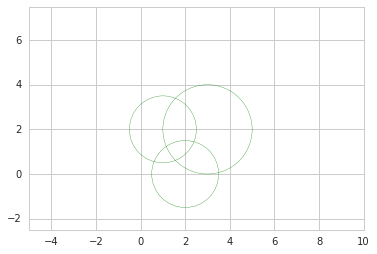

In [44]:
plotCircles(circle1,circle2,circle3)

In [26]:
#Make use of a third party library that implements some localisation functions
#Originally via https://github.com/kamalshadi/Localization
#The function could be made available via a package install rather than having the code visible

import localization as lx

def localiser(c1, c2, c3, mode='2D',solver='CCA'):
    
    #Define the localisation algorithm to use - here we find the centroid of the intersection
    P=lx.Project(mode=mode,solver=solver)

    #Create objects using the localization package with appropriate paramters
    P.add_anchor('A',c1[0])
    P.add_anchor('B',c2[0])
    P.add_anchor('C',c3[0])
    t,label=P.add_target()
    t.add_measure('A',c1[1])
    t.add_measure('B',c2[1])
    t.add_measure('C',c3[1])
    
    #Find the centroid of intersection of the circles
    P.solve()
    
    return t.loc.x,t.loc.y

In [27]:
localiser(circle1,circle2,circle3)

(1.74887839189825, 1.1310668205951402)

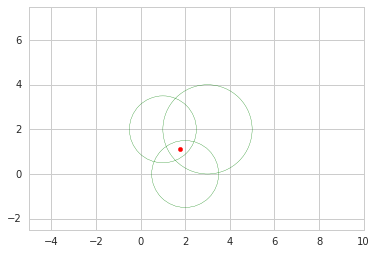

In [45]:
#Add a point to show the localised centroid
#Centroid found using localization function
plotCircles(circle1,circle2,circle3, localiser(circle1,circle2,circle3) )